# DATA 201: Week 4 Weather Statistics
For this exercise we will look at (nicely structured and formatted) weather station data from Jefferson Lab: https://www.jlab.org/fm/wx/


There are two comma separated value files that contain weather station data from the week of Huricane Dorian https://en.wikipedia.org/wiki/Hurricane_Dorian

**Read in the data (from the large file) into lists (or numpy arrays) and produce the following figures**:
1. Temperature vs Time
2. Wind speed vs Time
3. Barometric pressure vs Time
4. Temperature vs Time and Heat Index vs Time on the same plot w/Legend

Your plots must be properly labeled with units!

For the date time axis you may want to us np.datetime64() to cast the values to datetime objects which play nicely with matplotlib.

Column headers from headers.csv: `date_time,temperature,heat_index,humidity,barometric_pressure,wind_speed`

**Additional Questions that you should answer in your Jupyter notebook submission**:
1. What was the maximum wind speed? At what time was the maximum wind speed?
2. Is the barometric pressure lower or higher as a hurricane passed by? What was the barometric pressure and at what time
3. Do you notice a correlation between windspeed and time of day? If so, what is it?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv

In [3]:
with open(os.path.join("..", "data", "headers.csv")) as file:
    headers = file.readline().strip().split(',')



date_time = []
temperature = []
heat_index = []
barometric_pressure = []
wind_speed = []

with open(os.path.join("..", "data", "weather_09_01-08.csv")) as file:
    reader = csv.reader(file)
    for line in reader:
        date_time.append(line[0])
        temperature.append(line[1])
        heat_index.append(line[2])
        barometric_pressure.append(line[4])
        wind_speed.append(line[5])
        
date_time = np.array(date_time, dtype=np.datetime64)
temperature = np.array(temperature, dtype=np.float64)
heat_index = np.array(heat_index)
barometric_pressure = np.array(barometric_pressure)
wind_speed = np.array(wind_speed)

print(f"Headers: {headers}")
fig_x = 12
fig_y = 5

Headers: ['date_time', 'temperature', 'heat_index', 'humidity', 'barometric_pressure', 'wind_speed']


## Plot a Data Range vs Temperature with matplotlib and numpy

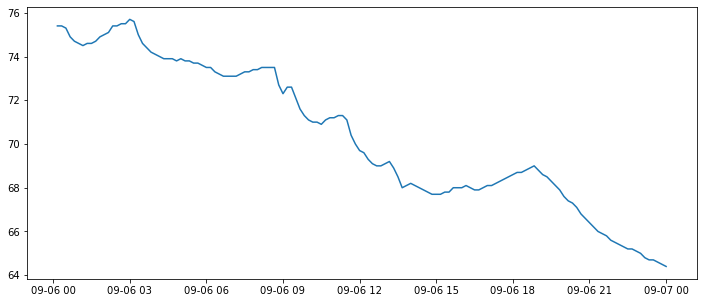

In [4]:
date_time[:5]

sept6 = np.datetime64('2019-09-06T00:01')
sept7 = np.datetime64('2019-09-07T00:01')
sept6_bool = (date_time > sept6) & (date_time < sept7)

plt.figure(figsize=(fig_x, fig_y))
plt.plot(date_time[sept6_bool],temperature[sept6_bool])
plt.show()

## Histogram of a date range vs temperature

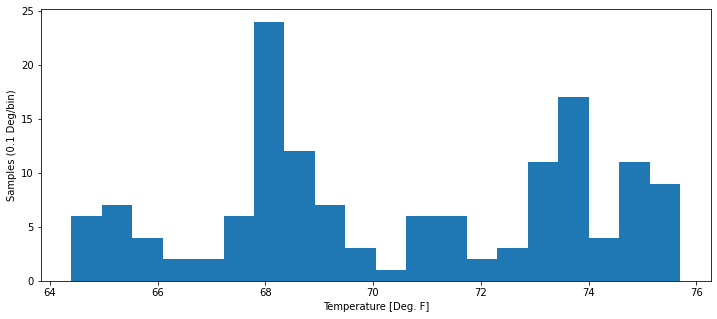

In [5]:
plt.figure(figsize=(fig_x, fig_y))
plt.xlabel("Temperature [Deg. F]")
plt.ylabel("Samples (0.1 Deg/bin)")
plt.hist(temperature[sept6_bool], bins=20)
plt.show()

In [11]:
print(temperature[sept6_bool].mean())
print(temperature[sept6_bool].std())

70.44545454545455
3.3120404897850877


In [7]:
each_day = []
temperature_means = []
temperature_stdev = []
temperature_dates = []

for i in range(1, 8):
    date_min = np.datetime64(f'2019-09-{i:02d}T00:01')
    date_max = np.datetime64(f'2019-09-{i+1:02d}T00:01')
    bool_for_one_day = (date_time > date_min) & (date_time < date_max)

    temperature_means.append(temperature[bool_for_one_day].mean())
    temperature_stdev.append(temperature[bool_for_one_day].std())
    temperature_dates.append(date_min)

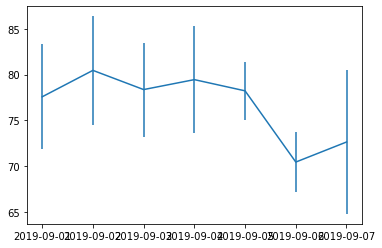

In [10]:
plt.errorbar(temperature_dates, temperature_means, yerr=temperature_stdev)
plt.show()